# GRN evaluation

In [21]:
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import sys 
import numpy as np
sys.path.insert(0, '../')
from src.commons import surragate_names, COLORS, LINESTYLES, MARKERS

grn_models = ['negative_control','positive_control', 'collectri','granie', 'figr', 'celloracle', 'scglue', 'scenicplus']
datasets = ['pearson', 'lognorm', 'seurat_pearson', 'seurat_lognorm', 'scgen_pearson', 'scgen_lognorm']

results_folder = '../results_folder'
%matplotlib inline
    

## Theta experiment

### Reg 1

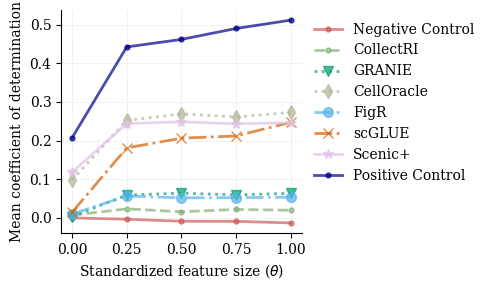

In [22]:
thetas_experiment = pd.read_csv(f'{results_folder}/benchmark/theta_experiment/reg1.csv', index_col=0)

def line_plot_theta(ax, results_df):
    markersize = 7
    linewidth = 2

    ax.grid(alpha=0.2, linewidth=.5, color='grey', linestyle='--')
    xs = np.linspace(0, 1, 5)
    for method, series in results_df.iterrows():        
        ax.plot(
            xs, series, label=method, color=COLORS[method], markersize=markersize,
            linestyle=LINESTYLES[method], marker=MARKERS[method], alpha=0.7, linewidth=linewidth
        )

    ax.set_xticks(xs)
    # ax.set_title(f'{surragate_names[norm_method]} ({reg_type})')
    ax.set_ylabel('Mean coefficient of determination')
    
        
    for side in ['right', 'top']:
        ax.spines[side].set_visible(False)
    ax.set_xlabel(r'Standardized feature size ($\theta$)')
    ax.legend(loc='upper left', bbox_to_anchor=(1,1), frameon=False)


fig, ax = plt.subplots(1, 1, figsize=(5, 3))

line_plot_theta(ax, thetas_experiment)
plt.tight_layout()
plt.savefig(f'{results_folder}/figs/first-validation-performance-theta.png', dpi=300, transparent=True)
plt.show()

## Subsample 200 for all layers

### Read the yaml file and create dfs for each GRN

In [60]:
base_folder = '../../task_grn_benchmark/resources/results/subsample_200_gb/'

result_file = f'{base_folder}/scores.yaml'
with open(result_file, 'r') as file:
    data = yaml.safe_load(file)
dfs = {}
for entry in data:
    method_id = entry['method_id']
    dataset_id = entry['dataset_id']
    if method_id not in dfs:
        dfs[method_id] = pd.DataFrame()
    metrics_dict = dict(zip(entry['metric_ids'], entry['metric_values']))
    df_entry = pd.DataFrame(metrics_dict, index=[dataset_id])
    dfs[method_id] = pd.concat([dfs[method_id], df_entry])

In [61]:
df_grn_dict = {}
for name in grn_models:
    # df_grn = pd.concat([dfs.get(f'reg1-{name}'), dfs.get(f'reg2-{name}')], axis=1)
    df_grn = pd.concat([dfs.get(f'reg1-{name}')], axis=1)
    print(name)
    df_grn_dict[name] = df_grn
df_grn.columns

negative_control
positive_control
collectri
granie
figr
celloracle
scglue
scenicplus


Index(['ex(True)_tf(-1)', 'ex(False)_tf(-1)', 'ex(True)_tf(140)',
       'ex(False)_tf(140)', 'Mean'],
      dtype='object')

In [ ]:
to_save_dir = '../results_folder/benchmark/200'
for name, df in df_grn_dict.items():
    df_reg2 = pd.read_csv(f'{to_save_dir}/{name}.csv', index_col=0)
    df = pd.concat([df, df_reg2], axis=1)
    df.to_csv(f'{to_save_dir}/{name}.csv')

### Plot heatmap

In [4]:
to_read_dir = '../results_folder/benchmark/200'

In [2]:
def headmap(scores, ax=None, name=''):
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(4, 4), sharey=True)
    scores = scores.astype(float)
    vmin = 0
    vmax = np.nanmax(scores)

    seaborn.heatmap(scores, ax=ax, square=False, cbar=False, annot=True, fmt='.2f', vmin=vmin, vmax=vmax)
    # Remove only the ticks, keep labels
    ax.tick_params(left=False, bottom=False)
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=0)
    ax.set_title(name, pad=10)

    

In [5]:
df_grn_dict = {}
for name in grn_models:
    df = pd.read_csv(f'{to_read_dir}/{name}.csv', index_col=0)
    df_grn_dict[name] = df

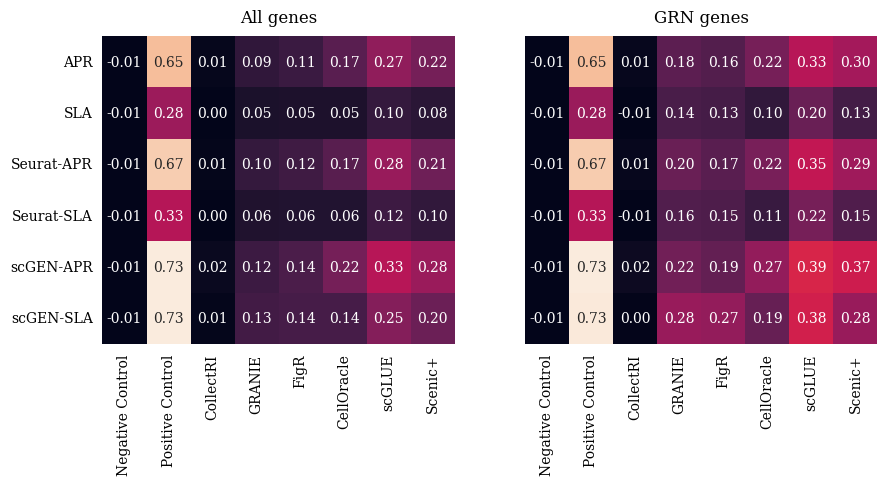

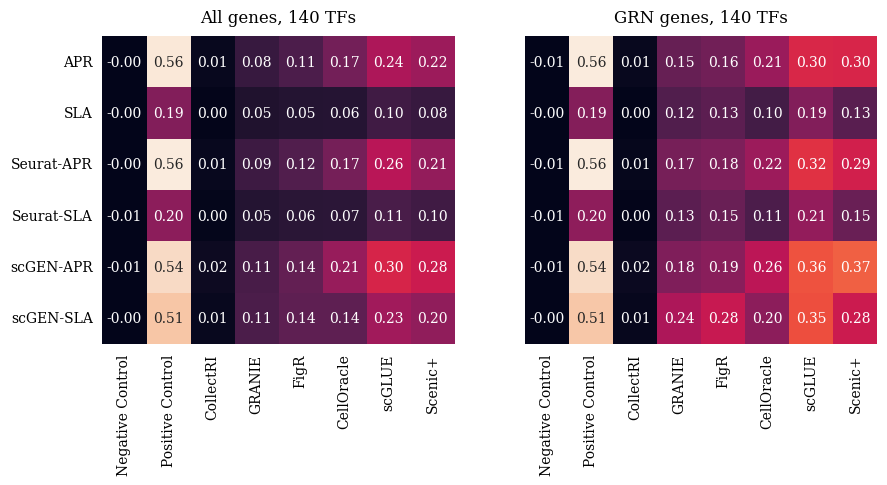

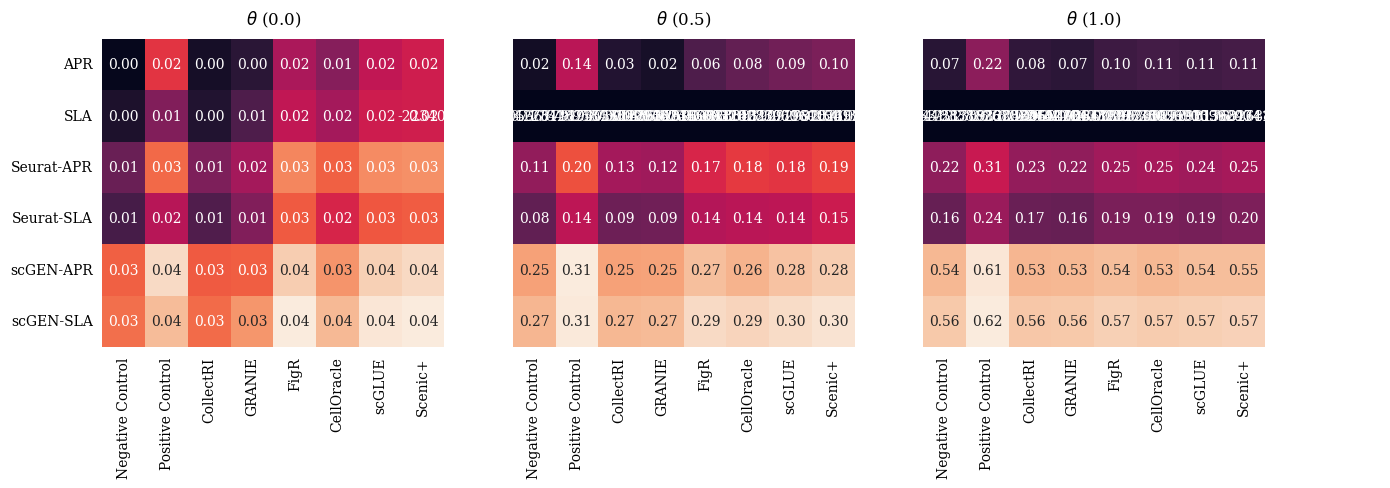

In [9]:
colname_map = {'ex(False)_tf(-1)':'All genes', 'ex(True)_tf(-1)':'GRN genes', 'ex(False)_tf(140)':'All genes, 140 TFs', 'ex(True)_tf(140)':'GRN genes, 140 TFs',
                'static-theta-0.0': r'$\theta$ (0.0)', 'static-theta-0.5': r'$\theta$ (0.5)', 'static-theta-1.0': r'$\theta$ (1.0)'}

def extract_col(col):
    scores = pd.DataFrame()
    for name, df in df_grn_dict.items():
        scores[name] = df[col]
    scores = scores.loc[datasets]
    scores.index = scores.index.map(surragate_names)
    scores.columns = scores.columns.map(surragate_names)
    return scores

fig, axes = plt.subplots(1,2, figsize=(10, 4), sharey=True)

ax =axes[0]
col = 'ex(False)_tf(-1)'
scores = extract_col(col)
headmap(scores, name=colname_map[col], ax=ax)

ax =axes[1]
col = 'ex(True)_tf(-1)'
scores = extract_col(col)
headmap(scores, name=colname_map[col], ax=ax)
plt.show()

fig.savefig(f"{results_folder}/figs/benchmark_all_layers_reg1_1.png", dpi=300, transparent=True, bbox_inches='tight')

fig, axes = plt.subplots(1,2, figsize=(10, 4), sharey=True)

ax =axes[0]
col = 'ex(False)_tf(140)'
scores = extract_col(col)
headmap(scores, name=colname_map[col], ax=ax)

ax =axes[1]
col = 'ex(True)_tf(140)'
scores = extract_col(col)
headmap(scores, name=colname_map[col], ax=ax)
plt.show()

fig.savefig(f"{results_folder}/figs/benchmark_all_layers_reg1_2.png", dpi=300, transparent=True, bbox_inches='tight')
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)


ax =axes[0]
col = 'static-theta-0.0'
scores = extract_col(col)
headmap(scores, name=colname_map[col], ax=ax)

ax =axes[1]
col = 'static-theta-0.5'
scores = extract_col(col)
headmap(scores, name=colname_map[col], ax=ax)

ax =axes[2]
col = 'static-theta-1.0'
scores = extract_col(col)
headmap(scores, name=colname_map[col], ax=ax)

plt.show()
fig.savefig(f"{results_folder}/figs/benchmark_all_layers_reg2.png", dpi=300, transparent=True, bbox_inches='tight')



In [53]:
aa

NameError: name 'aa' is not defined

# Infer

In [ ]:
pd.read_csv('../resources/results/trace.txt', sep='\t')

,task_id,hash,native_id,name,status,exit,submit,duration,realtime,%cpu,peak_rss,peak_vmem,rchar,wchar
0,1,b8/e0640b,4d233d72-5910-4f0e-b24f-e081785cf20d,grn_inference_celloracle:run_wf:celloracle:pro...,COMPLETED,0,2024-08-14 08:10:39.642,4h 5m 6s,3h 59m 20s,332.8%,33.9 GB,52.4 GB,52.2 GB,268.3 GB
1,2,23/37035e,eb89a28d-f7fe-4447-9d8d-6fd78233265a,grn_inference_celloracle:publishStatesSimpleWf...,COMPLETED,0,2024-08-14 12:15:46.817,19.2s,0ms,98.3%,1.5 MB,5.8 MB,366.3 MB,366.2 MB


In [ ]:
df = pd.read_csv('../resources/results/celloracle/celloracle/base_grn.csv')

In [ ]:
import celloracle as co
links_o = co.load_hdf5('../resources/results/infer/celloracle/output/celloracle/links.celloracle.links')
links_dict =  links_o.links_dict.copy()
grn_stack = []
tt = 0.05
for cell_type, grn in links_dict.items():
    print(f"{cell_type}, GRN before filter: {grn.shape}")
    mask = grn.p<tt # remove insig links
    grn = grn[mask]
    grn = grn[~(grn.coef_abs==0)] # remove those with 0 coeff
    # filter based on z score 
    z_scores = (grn.coef_abs - grn.coef_abs.mean())/grn.coef_abs.std()
    mask = z_scores > 2
    grn = grn.loc[mask, :]

    grn = grn[['source', 'target', 'coef_mean']]

    grn.columns = ['source', 'target', 'weight']

    print(cell_type, 'links:', len(grn), ' TFs: ', grn.source.unique().shape[0], ' target: ', grn.target.unique().shape[0],)    
    grn['cell_type'] = cell_type
    grn_stack.append(grn)
celloracle_grn = pd.concat(grn_stack).reset_index(drop=True)
grn = celloracle_grn.groupby(['source', 'target'])['weight'].apply(np.mean).to_frame().reset_index()

B cells, GRN before filter: (2370222, 6)
B cells links: 63294  TFs:  494  target:  6576
Myeloid cells, GRN before filter: (2370222, 6)
Myeloid cells links: 47871  TFs:  457  target:  6171
NK cells, GRN before filter: (2370222, 6)
NK cells links: 57455  TFs:  473  target:  6077
T cells, GRN before filter: (2370222, 6)
T cells links: 46719  TFs:  410  target:  6772


NameError: name 'pd' is not defined

In [ ]:
import pandas as pd 
grn_o = pd.read_csv('../resources/grn_models/celloracle.csv', index_col=0)
grn_new = pd.read_csv('../resources/results/infer/celloracle/output/grn.csv',index_col=0)

In [ ]:
grn.target.nunique()

1847

In [ ]:

import requests

# Send a GET request to the URL
response = requests.get("https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_45/gencode.v45.annotation.gtf.gz")

# Check if the request was successful
if response.status_code == 200:
    # Write the content to a file
    with open("gencode.v45.annotation.gtf.gz", 'wb') as file:
        file.write(response.content)
    print(f"File downloaded and saved as {output_file}")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")


KeyboardInterrupt: 